# Rafael Nunes Santana - 201800215

### Atividade 4 - Pesquisa Operacional I

Nessa atividade iremos implementar e explicar o método de eliminação de Gauss para resolver sistemas lineares.

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math
from functools import reduce

Implementação do professor para eliminação de Gauss:

In [3]:
## modulo gaussElim
''' x = gaussElim(a,b).
    Soluciona [a]{b} = {x} por Eliminacao de Gauss.
'''

def gaussElim(a, b):
    n = len(b)
    
    # Fase de Eliminacao Progressiva (escalonando a matriz)
    
    # iterando pelas colunas
    for k in range(0, n-1):
        # vamos zerar os elementos abaixo da diagonal principal usando o pivô, que assumimos ser diferente de 0
        for i in range(k+1, n):
            
            # só precisamos zerar o elemento se ele for diferente de 0
            if a[i,k] != 0.0:
                # calculado o fator necessário para zerar o elemento (i, k)
                lam = a [i,k]/a[k,k]
                
                # subtraindo a linha pivo multiplicado pelo fator (tanto em a quanto em b, pois estão separados)
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
                
    # Fase de Substituicao Regressiva (calculando os resultados)
    
    # iterando pelas colunas ao contrário
    for k in range(n-1,-1,-1):
        # utilizando os resultados anteriores (que estão sendo armazenados em b) para calcular progressivamente
        # os resultados
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
        
    return b

# 1 Simplificando o algoritmo

Na minha opinião o algoritmo pode ser melhorado/simplificado principalmente na parte de entendimento, certas variáveis podem ter nomes mais claros e os processos podem ser mais bem destrinchados. Além disso, é uma boa prática não modificar as entradas das funções, mesmo em situações onde passamos valores por valor e não referência. Além disso, na minha solução eu junto A e b em uma só matriz [A|b], reduzindo o número de operações para escalonar a matriz. E, por fim, antes de começar o processo eu verifico as dimensões de A e b, para verificar se podemos realizar a operação e, se não, dar uma mensagem de erro clara para o usuário

Minha implementação da eliminação de Gauss simplificando e tornando de mais fácil entendimento:

In [4]:
# Função que resolve um sistema linear do tipo Ax = b por eliminação de Gauss

def eliminacao_gauss(A: np.array, b: np.array) -> np.array:
    
    # verificando se os argumentos estão no shape desejado para que a operação seja possível
    shape_A = A.shape
    shape_b = b.shape
    
    if len(shape_b) != 1 or len(shape_A) != 2 or shape_A[0] != shape_A[1] or shape_A[0] != shape_b[0]:
        raise Exception("Entrada mal formatada. A deve ter shape (a, a) e b (a)")  
        
    linhas_A, colunas_A = shape_A
    
    # montando a matriz do sistema [A|b]
    sistema = np.append(A, b.reshape([linhas_A, 1]), axis=1)
    
    '''
        1ª etapa: vamos escalonar a matriz do sistema
        
        Temos que zerar todos os elementos abaixo da diagonal principal. Para tal fazemos o seguinte:
        - A cada coluna escolhemos o pivo como o elemento (k, k) e a linha pivo como a linha k
        - A cada linha com indice maior que k, calculamos um fator que é igual a sistema[i, k] / pivo
        - Subtraímos da linha k a linha pivo multiplicada pelo fator acima
    '''
    
    # iterando pelas colunas da matriz A
    for k in range(0, colunas_A):
        
        # vamos zerar os elementos abaixo da diagonal principal usando o pivô, que assumimos ser diferente de 0
        pivo = sistema[k, k]
        linha_pivo = sistema[k]
        
        for i in range(k + 1, linhas_A):
            
            # só precisamos zerar o elemento se ele for diferente de 0
            if sistema[i, k] == 0:
                continue
            
            # calculado o fator necessário para zerar o elemento (i, k)
            fator = sistema[i, k] / pivo
            # subtraindo a linha pivo multiplicado pelo fator
            sistema[i] -= fator * linha_pivo
            
    '''
        2ª etapa: vamos resolver o sistema [A|b]
        
        A útima linha tem solução trivial, então começamos por ela, temos que resultado[i] = 
        sistema[i, colunas_A] / sistema[i, i], sendo i = linhas_A
        
        Para as outras linhas temos que utilizar os resultados já calculados para somar em um acumulador,
        onde é sempre somado resultado[k] * sistema[i, k] (x[k] * a[i, k]), que será subtraído do lado direito
        do sistema (o vetor b)
    '''
    
    # criando o resultado inicialmente vazio
    resultado = np.empty([linhas_A], dtype=A.dtype)
    
    # iterando pelas linhas, começando pela última (a que pode ser resolvidade de forma direta)
    for i in range(linhas_A - 1, -1, -1):
        
        soma_elementos_direita = 0
        
        # iterando pelas colunas, todas à direta da diagonal principal tem valor diferente de 0 e devemos utilizar
        # os resultados já calculados para resolver a variável atual
        for k in range(colunas_A -1, i, -1):
            soma_elementos_direita += resultado[k] * sistema[i, k]
            
        # subtraindo a contribuição dos elementos a direta da diagonal principal
        lado_direito = sistema[i, colunas_A] - soma_elementos_direita
        # calculado o resultado equivalente a essa linha
        resultado[i] = lado_direito / sistema[i, i]
            
    return resultado

In [5]:
A = np.array([[0.0003, 3], [1, 1]])
b = np.array([2.0001, 1])

print("Nossa implementação:\t\t", eliminacao_gauss(A, b))
print("Implementação do professor:\t", gaussElim(A, b))

Nossa implementação:		 [0.33333333 0.66666667]
Implementação do professor:	 [0.33333333 0.66666667]


Como podemos ver, nossa implementação encontrou a solução do sistema corretamente

# Fluxograma da solução:

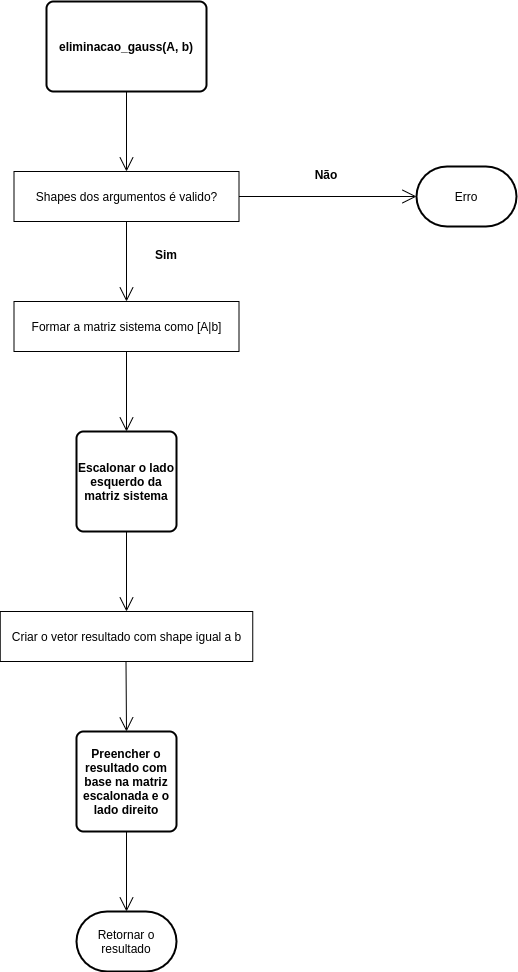

# 2 Resolvendo os sistemas dos slides da aula com nossa implementação:

In [6]:
A1 = np.array([[0.3, 0.52, 1], [0.5, 1, 1.9], [0.1, 0.3, 0.5]])
b1 = np.array([-0.01, 0.67, -0.44])

print(eliminacao_gauss(A1, b1))

A2 = np.array([[1, 2, 1], [2, 5, 3], [1, 3, 4.0]])
b2 = np.array([2, 1, 5.0])

print(eliminacao_gauss(A2, b2))

A3 = np.array([[1, 1, 1], [2, 2, 3], [1, 2, 3.0]])
b3 = np.array([3, 7, 6.0])

print(eliminacao_gauss(A3, b3))

[-14.9 -29.5  19.8]
[11. -6.  3.]
[nan nan nan]


<ipython-input-4-e2ea1bed4208>:40: RuntimeWarning: divide by zero encountered in double_scalars
  fator = sistema[i, k] / pivo
<ipython-input-4-e2ea1bed4208>:42: RuntimeWarning: invalid value encountered in multiply
  sistema[i] -= fator * linha_pivo
<ipython-input-4-e2ea1bed4208>:71: RuntimeWarning: invalid value encountered in double_scalars
  resultado[i] = lado_direito / sistema[i, i]


Como podemos ver, nossa implementação solucionou corretamente os dois sistema, porém o último sistema tem um pivô igual a zero, o que nosso algoritmo ingênuo assume que não iria ocorrer, portanto iríamos precisar de um algoritmo mais sofisticado para resolver tal sistema

# 3 Benchmarks do algoritmo

In [7]:
# função wrapper que retorna o tempo em segundos que a função levou para executar
def benchmark(funcao, A, b):
    start = time.process_time()
    funcao(A, b)
    end = time.process_time()
    
    return end - start

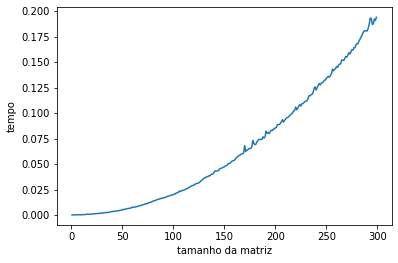

In [8]:
tamanhos = []
tempos = []

# rodando nossa função para matrizes de tamanho 1 até 299 e plotanto os resultados
for i in range (1, 300):
    A_aleatoria = np.random.rand(i, i)
    b_aleatorio = np.random.rand(i)
    
    tamanhos.append(i)
    tempos.append(benchmark(eliminacao_gauss, A_aleatoria, b_aleatorio))

plt.xlabel('tamanho da matriz')
plt.ylabel('tempo')
plt.plot(tamanhos, tempos)

Vamos agora tentar linearizar nossos dados tirando a raiz cúbica de cada um dos nossos tempos, tentando provar que a nossa implementação tem complexidade de tempo O(n³)

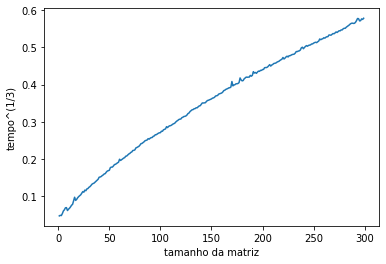

In [9]:
tempos_lineares = [math.pow(i, 1/3) for i in tempos]

plt.xlabel('tamanho da matriz')
plt.ylabel('tempo^(1/3)')
plt.plot(tamanhos, tempos_lineares)

Como podemos ver, agora nsso gráfico se assemelha a uma reta. Vamos calcular a correlação dessa distribuição usando a seguinte fórmula:

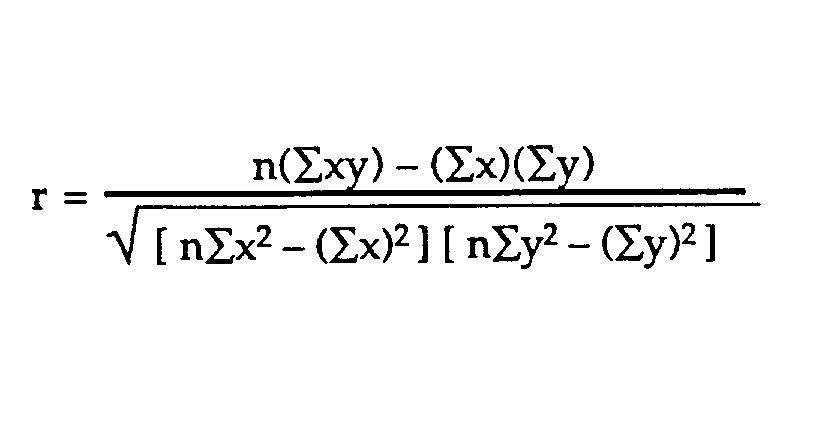

E comparando o resultado com 1 (quanto mais próximo de 1 mais linear, o que implica que a distribuição original era próxima de y = ax³)

In [11]:
def calcula_S(valores):
    soma = sum(valores)
    soma_quadrado = sum([math.pow(i, 2) for i in valores])

    S = soma_quadrado - (math.pow(soma, 2) / len(valores))
    return S

Sx = calcula_S(tamanhos)
Sy = calcula_S(tempos_lineares)

soma_x = sum(tamanhos)
soma_y = sum(tempos_lineares)
soma_xy = sum([i[0] * i[1] for i in zip(tamanhos, tempos_lineares)])

Sxy = soma_xy - ((soma_x * soma_y) / len(tamanhos))

r = Sxy / (math.sqrt(Sx) * math.sqrt(Sy))
print("Coeficiente de linearidade:", r)

Coeficiente de linearidade: 0.9946903390951416


Como podemos ver, temos um coeficiente de linearidade praticamente igual a 1, logo provamos que nossa dsitribuição original segue a fórmula y = ax³ e nosso algoritmo tem complexidade de tempo de O(n³)